<a href="https://colab.research.google.com/github/flikrama/UH-SPE-ML-Bootcamp-Team4-Project1/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **###Importing Necessary packages**


In [3]:
# We are doing World Happiness Report from 2015-2019
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import NaN as NA
import seaborn as sns
!pip install bubbly #had to add to avoid error - Miguel
from bubbly.bubbly import bubbleplot
import plotly.graph_objs as go
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  Created wheel for bubbly: filename=bubbly-1.0.2-cp36-none-any.whl size=5428 sha256=2b1ab03c12ab6ad509c6ae362c5f72ca2e601ae61cf3aa50e273aa80fea110c7
  Stored in directory: /root/.cache/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


In [4]:
# Interactive Plotting
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

In [5]:
from sklearn import preprocessing
import sklearn.linear_model as lm

In [6]:
from sklearn.feature_selection import rfe
from sklearn.model_selection import  KFold

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.rfe module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection.rfe. Anything that cannot be imported from sklearn.feature_selection.rfe is now part of the private API.



In [7]:
#For imputing Missing values
from sklearn.impute import  SimpleImputer

# **Data Loading and Merging**

In [15]:
from google.colab import files
uploaded = files.upload()


Saving 2019.csv to 2019.csv


In [16]:
df2015= pd.read_csv('2015.csv') # would you like to index the first column? index by adding index_col=0 *just checking
df2016= pd.read_csv('2016.csv')
df2017= pd.read_csv('2017.csv')
df2018= pd.read_csv('2018.csv')
df2019= pd.read_csv('2019.csv')

In [17]:
yearsData = ['2015','2016','2017','2018','2019']
dfs = [df2015.shape,df2016.shape,df2017.shape,df2018.shape,df2019.shape]

for i in range(len(dfs)):
  print("Current dimensions for {0} are {1}".format(yearsData[i],dfs[i])) 

Current dimensions for 2015 are (158, 12)
Current dimensions for 2016 are (157, 13)
Current dimensions for 2017 are (155, 12)
Current dimensions for 2018 are (156, 9)
Current dimensions for 2019 are (156, 9)


In [18]:
df2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [19]:
# drop columns
df2015.drop(['Region','Standard Error','Dystopia Residual'],axis=1, inplace = True) 
print('columns are dropped!')
print(df2015.shape)

columns are dropped!
(158, 9)


In [20]:
# rename columns
df2015.rename(columns = {'Trust (Government Corruption)':'Perceptions of corruption','Country':'Country or Region',
                         'Family':'Social Support','Freedom':'Freedom to make life choices'},inplace = True)

# switch columns "Perceptions of Corruption" and "Generosity"
df2015.columns
df2015new = df2015[['Country or Region','Happiness Rank', 'Happiness Score',

       'Economy (GDP per Capita)', 'Social Support',
       'Health (Life Expectancy)', 'Freedom to make life choices','Generosity','Perceptions of corruption']]
df2015new

,Country or Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062


In [21]:
df2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [22]:
# drop columns
df2016.drop(['Region','Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'],axis=1, inplace = True) 
print('columns are dropped!')
print(df2016.shape)

columns are dropped!
(157, 9)


In [23]:
# rename columns
df2016.rename(columns = {'Trust (Government Corruption)':'Perceptions of corruption','Country':'Country or Region',
                         'Family':'Social Support','Freedom':'Freedom to make life choices'},inplace = True)

# switch columns "Perceptions of Corruption" and "Generosity" 
df2016.columns
df2016new = df2016[['Country or Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social Support',
       'Health (Life Expectancy)', 'Freedom to make life choices','Generosity','Perceptions of corruption']]
df2016new

,Country or Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004
...,...,...,...,...,...,...,...,...,...
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.20180,0.06681
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.17517,0.11587
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.48397,0.17233


In [24]:
df2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [25]:
# drop columns
df2017.drop(['Whisker.high','Whisker.low','Dystopia.Residual'],axis=1, inplace = True) 
print('columns are dropped!')
print(df2017.shape)

columns are dropped!
(155, 9)


In [26]:
# rename columns
df2017.rename(columns = {'Trust..Government.Corruption.':'Perceptions of corruption','Country':'Country or Region',
                         'Family':'Social Support','Freedom':'Freedom to make life choices','Happiness.Rank':'Happiness Rank',
                         'Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                         'Health..Life.Expectancy.':'Health (Life Expectancy)'},inplace = True)

# just needed to rename dataframe for this part
df2017new = df2017
df2017new

,Country or Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612
...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148


In [27]:
df2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [28]:
# rename columns
df2018.rename(columns = {'Overall rank':'Happiness Rank','Country or region':'Country or Region','Score':'Happiness Score',
                         'GDP per capita':'Economy (GDP per Capita)', 'Social support': 'Social Support',
                         'Healthy life expectancy':'Health (Life Expectancy)'},inplace = True)

# switch "Country or region" and "Happiness Rank"
df2018.columns
df2018new = df2018[['Country or Region', 'Happiness Rank', 'Happiness Score','Economy (GDP per Capita)', 
                    'Social Support','Health (Life Expectancy)', 'Freedom to make life choices','Generosity','Perceptions of corruption']]
df2018new

,Country or Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,Yemen,152,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,Tanzania,153,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,South Sudan,154,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,Central African Republic,155,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [29]:
df2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [30]:
# rename columns
df2019.rename(columns = {'Overall rank':'Happiness Rank','Country or region':'Country or Region','Score':'Happiness Score',
                         'GDP per capita':'Economy (GDP per Capita)','Social support': 'Social Support',
                         'Healthy life expectancy':'Health (Life Expectancy)'},inplace = True)

# switch "Country or region" and "Happiness Rank"
df2019new = df2019[['Country or Region', 'Happiness Rank', 'Happiness Score','Economy (GDP per Capita)', 
                    'Social Support','Health (Life Expectancy)', 'Freedom to make life choices','Generosity','Perceptions of corruption']]
df2019new

,Country or Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [31]:
df2015new.loc[:,"Year"] = 2015
df2016new.loc[:,"Year"] = 2016
df2017new.loc[:,"Year"] = 2017
df2018new.loc[:,"Year"] = 2018
df2019new.loc[:,"Year"] = 2019

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
# yearsData was defined at the beginning of script
dfsNew = [df2015new.shape,df2016new.shape,df2017new.shape,df2018new.shape,df2019new.shape]

for i in range(len(dfsNew)):
  print("Current dimensions for {0} are {1}".format(yearsData[i],dfsNew[i])) 

print("")



Current dimensions for 2015 are (158, 10)
Current dimensions for 2016 are (157, 10)
Current dimensions for 2017 are (155, 10)
Current dimensions for 2018 are (156, 10)
Current dimensions for 2019 are (156, 10)



In [33]:
#Merging Datasets
df = pd.concat([df2015new,df2016new,df2017new,df2018new,df2019new])
df.index = np.arange(1, len(df)+1)
df

,Country or Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption,Year
1,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
2,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
3,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
4,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
5,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...
778,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,2019
779,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,2019
780,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,2019
781,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500,2019


Understanding High level structure of the dataset

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 1 to 782
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or Region             782 non-null    object 
 1   Happiness Rank                782 non-null    int64  
 2   Happiness Score               782 non-null    float64
 3   Economy (GDP per Capita)      782 non-null    float64
 4   Social Support                782 non-null    float64
 5   Health (Life Expectancy)      782 non-null    float64
 6   Freedom to make life choices  782 non-null    float64
 7   Generosity                    782 non-null    float64
 8   Perceptions of corruption     781 non-null    float64
 9   Year                          782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


In [35]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125436,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105816,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054000,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.091000,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.156030,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910,2019.000000


In [36]:
print('The dataset has {} missing values.'.format(df.isnull().sum().sum()))

The dataset has 1 missing values.


In [37]:
df.isnull().sum()

Country or Region               0
Happiness Rank                  0
Happiness Score                 0
Economy (GDP per Capita)        0
Social Support                  0
Health (Life Expectancy)        0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
Year                            0
dtype: int64

In [38]:
print('These column(s) contain at least 1 missing value:', df.columns[df.isnull().sum() > 0].tolist())

These column(s) contain at least 1 missing value: ['Perceptions of corruption']


In [39]:
#Filling missing value with Median
df.fillna(df.median(), inplace=True)

# **# Descriptive Analytics**

---




###Checking for the corelations in the data 

#### Quickly geting an idea of the overall correlation between the target variable and each input variable
>Correlations are sorted in descending order. Thus, those variables at the bottom do not necessarily have the least predictive power; predictive power depends on the absolute value of correlation - generally, the larger the absolute value of correlation, the higher its predictive power



In [40]:
df.corr()['Happiness Score'].sort_values(ascending=False)

Happiness Score                 1.000000
Economy (GDP per Capita)        0.789284
Health (Life Expectancy)        0.742456
Social Support                  0.648799
Freedom to make life choices    0.551258
Perceptions of corruption       0.397484
Generosity                      0.137578
Year                            0.007065
Happiness Rank                 -0.992066
Name: Happiness Score, dtype: float64

In [41]:
df.corr()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption,Year
Happiness Rank,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.117713,-0.371810,-0.007768
Happiness Score,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.137578,0.397484,0.007065
Economy (GDP per Capita),-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,-0.014560,0.303427,0.019768
Social Support,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,-0.037262,0.126707,0.367431
Health (Life Expectancy),-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.010638,0.250390,0.130302
Freedom to make life choices,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.290706,0.459705,0.010353
Generosity,-0.117713,0.137578,-0.014560,-0.037262,0.010638,0.290706,1.000000,0.318995,-0.192587
Perceptions of corruption,-0.371810,0.397484,0.303427,0.126707,0.250390,0.459705,0.318995,1.000000,-0.122513
Year,-0.007768,0.007065,0.019768,0.367431,0.130302,0.010353,-0.192587,-0.122513,1.000000


###Inferences 


*   `Happiness Score`, the target variable, has a correlation of 1 with itself (the highest possible value), which is correct.
*   All other variables except `Generosity` appear to predict the `Happiness Score` with medium corealtion.
*   The usefulness and independency of the the variable `Generosity` in predicting the target variable will be checked in feature selection techniques.





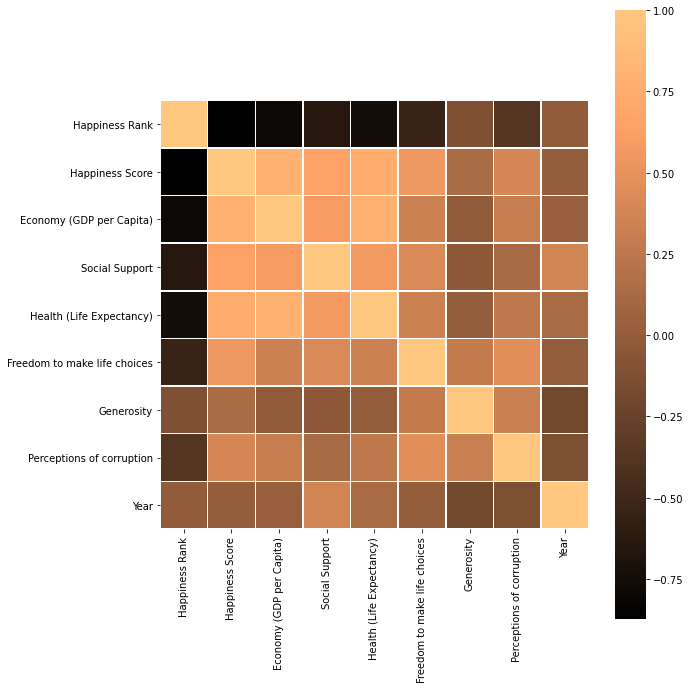

In [42]:
plot_1= plt.subplots(figsize=(9.6,11.2))
sns.heatmap(df.corr(),fmt='d', cmap="copper", linewidths=0.6, square=True,robust=True)

####Inference 
From the above heatmap, we can see that Happiness Score is highly correlated with Social Support,Economoy or GDP per capita, Freedom. It is also logical since these are the basic principles to provide happiness to a human being. 
It is somewhat related to generosity with medium to low correlation. 


In [43]:

figure = bubbleplot(dataset = df, x_column = 'Happiness Score', y_column = 'Generosity', 
    bubble_column = 'Country or Region', size_column = 'Economy (GDP per Capita)', color_column = 'Country or Region', 
    x_title = "Happiness Score", y_title = "Generosity", title = 'Happiness vs Generosity vs Economy',
    x_logscale = False, scale_bubble = 0.5, height = 800)

py.iplot(figure, config={'scrollzoom': True})

/usr/local/lib/python3.6/dist-packages/plotly/offline/offline.py:159: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



In [45]:

figure = bubbleplot(dataset = df, x_column = 'Happiness Score', y_column = 'Social Support', 
    bubble_column = 'Country or Region', size_column = 'Economy (GDP per Capita)', color_column = 'Country or Region', 
    x_title = "Happiness Score", y_title = "Social Support", title = 'Happiness vs Social Support vs Economy',
    x_logscale = False, scale_bubble = 0.5, height = 650)

py.iplot(figure, config={'scrollzoom': True})

/usr/local/lib/python3.6/dist-packages/plotly/offline/offline.py:159: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



In [46]:

figure = bubbleplot(dataset = df, x_column = 'Happiness Score', y_column = 'Freedom to make life choices', 
    bubble_column = 'Country or Region', size_column = 'Economy (GDP per Capita)', color_column = 'Country or Region', 
    x_title = "Happiness Score", y_title = "Freedom to make life choices", title = 'Happiness vs Freedom to make life choices vs Economy',
    x_logscale = False, scale_bubble = 0.5, height = 800)

py.iplot(figure, config={'scrollzoom': True})

/usr/local/lib/python3.6/dist-packages/plotly/offline/offline.py:159: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



In [ ]:

figure = bubbleplot(dataset = df, x_column = 'Happiness Score', y_column = 'Health (Life Expectancy)', 
    bubble_column = 'Country or Region', size_column = 'Economy (GDP per Capita)', color_column = 'Country or Region', 
    x_title = "Happiness Score", y_title = "Health", title = 'Happiness vs Health vs Economy',
    x_logscale = False, scale_bubble = 0.5, height = 650)

py.iplot(figure, config={'scrollzoom': True})

### With the help of Bubble Plots we tried to show the relationships between Target variable (Happiness Score) with other variables such as Health, Social Support, Economy etc. In all the chart the size of bubble represents the Economy or GDP of the country .

####**Inferences**



*   We can see infer that as the health score increases, Happiness Score increases. So there is a direct relatioship between them.
*   This case is same in case of social support. Whereas, Generosity doesnt portrays direct relationship with target variable. 
*   Most of the countries in Americas shows high happiness index on the contrary most of the conturies in Africa with shows low happiness index.
*   Countries belonging to Europe shows very high happiness index. 






###Drilling down the data by features in order to see the top countries with respect to each variable. 

---



1. Top 10 Consistently Generous Countries across the span of 5 years.

In [ ]:
df[['Country or Region', 'Generosity']].sort_values(by = 'Generosity',
                                                ascending = False).head(10)

2. Top 10  Consistent Countries with most freedom to make choices across the span of 5 years.

In [ ]:
df[['Country or Region', 'Freedom to make life choices']].sort_values(by = 'Freedom to make life choices',
                                                ascending = False).head(10)

3. Countries with worst Health (Life Expectancy) for 5 years span.

In [47]:
df[['Country or Region', 'Health (Life Expectancy)']].sort_values(by = 'Health (Life Expectancy)').head(10)

,Country or Region,Health (Life Expectancy)
761,Swaziland,0.000000
123,Sierra Leone,0.000000
269,Sierra Leone,0.000000
454,Lesotho,0.000000
583,Sierra Leone,0.000000
421,Sierra Leone,0.005565
625,Central African Republic,0.010000
470,Central African Republic,0.018773
302,Chad,0.038240
452,Chad,0.041135


4. Top Countries with Best Economy (GDP per Capita) for 5 years.

In [48]:
df[['Country or Region', 'Economy (GDP per Capita)']].sort_values(by = 'Economy (GDP per Capita)',
                                                ascending = False).head(10)

,Country or Region,Economy (GDP per Capita)
490,United Arab Emirates,2.096000
350,Qatar,1.870766
194,Qatar,1.824270
333,Luxembourg,1.741944
178,Luxembourg,1.697520
341,Singapore,1.692278
28,Qatar,1.690420
655,Qatar,1.684000
502,Qatar,1.649000
180,Singapore,1.645550


### Statistical Distribution Check for features.

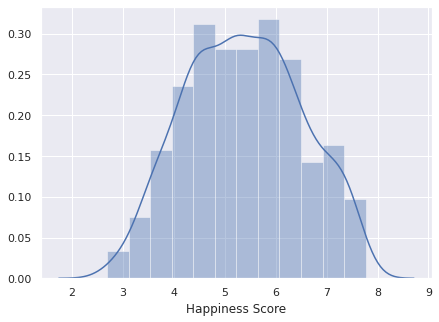

In [49]:
fig = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(df['Happiness Score'],bins=12);

We can see that the distribution doesnt belong to normal distribution sicne the tails are not equal at both ends. This is the case of bimodal distribtution.

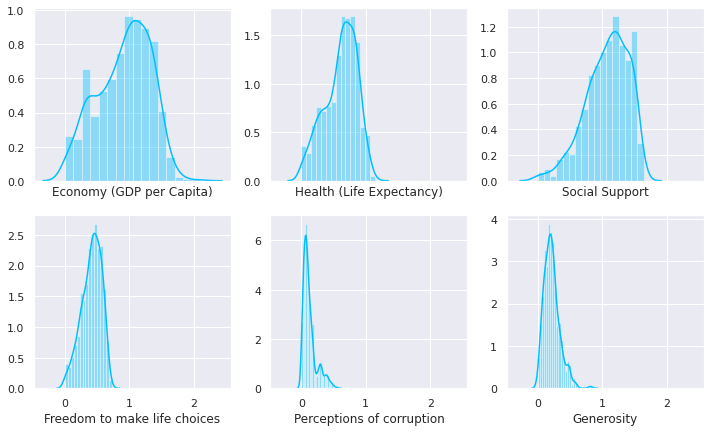

In [50]:
f, axes = plt.subplots(2, 3, figsize=(12,7), sharex=True)
sns.distplot( df["Economy (GDP per Capita)"] , color="deepskyblue", ax=axes[0, 0])
sns.distplot( df["Health (Life Expectancy)"] , color="deepskyblue", ax=axes[0, 1])
sns.distplot( df["Social Support"] , color="deepskyblue", ax=axes[0, 2])
sns.distplot( df["Freedom to make life choices"] , color="deepskyblue", ax=axes[1,0 ])
sns.distplot( df["Perceptions of corruption"] , color="deepskyblue", ax=axes[1,1])
sns.distplot( df["Generosity"] , color="deepskyblue", ax=axes[1, 2])

###Inferences


*   Most of the distributions of the variables seems normal.  
*   `Perceptions of corruption` and `Generosity` have short range of values because of which the distribtution is slendered and are slightly right tailed.
*   Other variables except `Perceptions of corruption` and `Generosity` are approximately symmetrical. 


In [51]:
#Errors in this code. 

p2015 = go.Scatter(
                    x = [df[df['Year']==2015],
                    y = df['Happiness Score'],
                    mode = "lines",
                    name = "2015",
                    marker = dict(color = 'green'),
                    text= df['Country or Region'])
figdata = [p2015]
iplot(figdata)


p2016 = go.Scatter(
                    x = df[df['Year']==2016],
                    y = df['Happiness Score'],
                    mode = "lines",
                    name = "2016",
                    marker = dict(color = 'green'),
                    text= df['Country or Region'])


p2017 = go.Scatter(
                    x = df[df['Year']==2017],
                    y = df['Happiness Score'],
                    mode = "lines",
                    name = "2017",
                    marker = dict(color = 'green'),
                    text= df['Country or Region'])

p2018 = go.Scatter(
                    x = df[df['Year']==2018],
                    y = df['Happiness Score'],
                    mode = "lines",
                    name = "2018",
                    marker = dict(color = 'green'),
                    text= df['Country or Region'])

p2019 = go.Scatter(
                    x = df[df['Year']==2019],
                    y = df['Happiness Score'],
                    mode = "lines",
                    name = "2019",
                    marker = dict(color = 'green'),
                    text= df['Country or Region'])
data = [p15, p16, p17, p18, p19]
properties = dict(title = 'Happiness Score vs GDP per Capita',
              xaxis= dict(title= 'GDP per Capita',ticklen= 5,zeroline= False),
             yaxis= dict(title= 'Happiness Score',ticklen= 5,zeroline= False),
             )
fig = dict(data = data, layout = properties)
iplot(fig)


SyntaxError: ignored

In [52]:
fig = px.scatter(df, x='Economy (GDP per Capita)', 
                 y="Happiness Score",
                 facet_row="Year",
                color="Year",
                trendline= "ols")
fig.update(layout_coloraxis_showscale=False)
fig.update_traces(textposition='top center')
fig.update_layout(
    height=800,
    title_text='GDP per capita and Happiness Score'
)
fig.show()

###**Inference**
With yearwise comparison, we can can cofirm that Economy (GDP per capita) has linear relationship moreover it shows positive corelation. In other words, If Economy or GDP per capita increase for a certain country then its Happiness Score will increase provided that all other variables are kept constant. 

# **Cross Validation**

In [53]:
ydata = df['Happiness Score']
xdata = df.loc[:, df.columns != 'Happiness Score']


In [54]:
#Normalization of the variables
standardized_X = preprocessing.scale(xdata.loc[:, xdata.columns != 'Country or Region'])

# **Ridge Regression**

Ridge code is from http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

In [55]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [56]:

X = df.drop(['Country or Region','Happiness Score','Happiness Rank','Year'], axis = 1)
y = df['Happiness Score']

In [57]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [58]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 6)

Text(0, 0.5, 'weights')

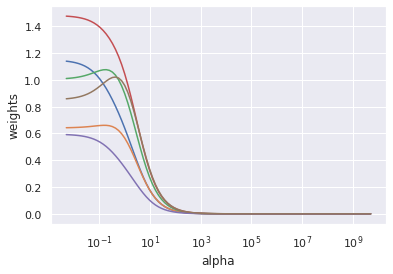

In [59]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [60]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=1)

In [61]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.06164233697210317

In [62]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

0.29988247733813267

In [81]:
error_Ridge = ridge4.predict(X_test) - y_test

Text(0, 0.5, 'Prediction Error Ridge')

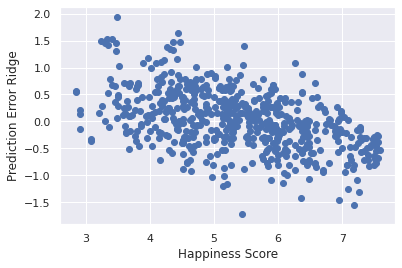

In [82]:
# Plotting residual error versus actual value
%matplotlib inline
plt.scatter(y_test, error)
plt.xlabel('Happiness Score')
plt.ylabel('Prediction Error Ridge')

Text(0, 0.5, 'weights')

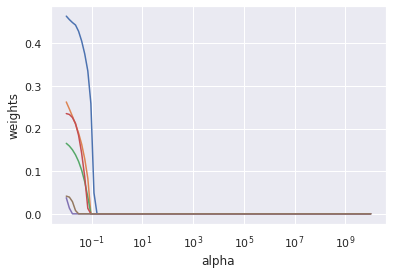

In [83]:
#Lasso code from http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [84]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

0.30426023380091516

In [79]:
# None of coefficients are reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

Economy (GDP per Capita)        1.196163
Social Support                  0.925227
Health (Life Expectancy)        0.734200
Freedom to make life choices    1.528810
Generosity                      0.876543
Perceptions of corruption       0.445596
dtype: float64

In [85]:
error_Lasso = lasso.predict(X_test) - y_test

Text(0, 0.5, 'Prediction Error Lasso')

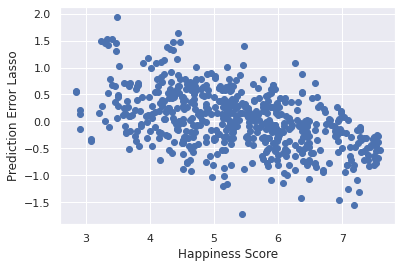

In [86]:
plt.scatter(y_test, error)
plt.xlabel('Happiness Score')
plt.ylabel('Prediction Error Lasso')